In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "abc-ages")
import population_model

In [373]:
exploits = pd.read_csv("results/exploits.csv", sep=";")

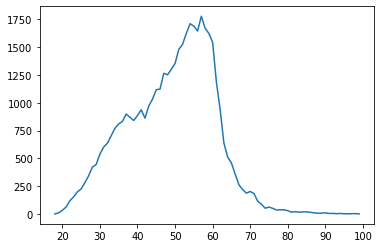

In [374]:
y1, x1 = np.histogram(exploits["age"], bins=range(18, 101))
plt.plot(x1[:-1],y1)
hist_start = y1

In [375]:
model = population_model.PopulationModel(hist_start,"out/abc_10000.Rdata_param.csv", "out/abc_10000.Rdata_weights.csv",nbsamples=50)

In [376]:
target = model.step_year()
hist_end = target[0]
for i in range(1,50):
    if sum(target[i]) < sum(hist_end):
        hist_end = target[i]

In [377]:
drop = sum(hist_start) - sum(hist_end)
drop

2845

In [378]:
retirement_treshold = pd.read_csv("out/abc_10000.Rdata_param.csv")["V5"]
retirement_treshold = int(retirement_treshold.mean())+18

In [385]:
#TODO exploits[age] = new distrib

In [379]:
sample = exploits[exploits["age"] < retirement_treshold].sample(drop) # todo seed 

In [383]:
# scenarios TODO representative weights
cereales = [1,2,3,4]
sample["cultures"] = sample["cultures"].apply(lambda x: np.random.choice(cereales, len(x)))
exploits = exploits.drop(list(sample.index.values))
exploits = pd.concat([sample, exploits], axis=0)

In [381]:
exploits.sample(5)

gid  id_expl  age  \
37617  794816    37627   34   
23373  817896    23383   53   
12912  591823    12922   57   
35367  389919    35377   62   
43008  410626    43018   62   

                                                cultures                pra  
37617               [21, 21, 21, 21, 21, 21, 21, 21, 19]    CÃ´te roannaise  
23373  [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...         Tarentaise  
12912                           [18, 18, 18, 18, 18, 18]             Cantal  
35367                                           [17, 17]          Maurienne  
43008                                [1, 1, 2, 1, 3, 18]  Monts du Lyonnais

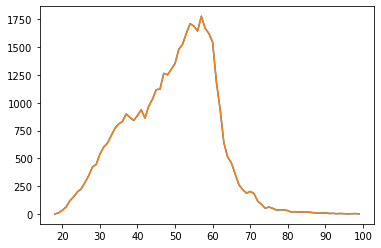

In [384]:
y2, x2 = np.histogram(exploits["age"], bins=range(18, 101))
plt.plot(x1[:-1],y1)
plt.plot(x2[:-1],y2)